In [13]:
import pandas as pd
import numpy as np

In [14]:
file = 'titanic.csv'
df_4 = pd.read_csv(file, index_col='PassengerId')
df_4 = df_4.dropna()
df_4 = df_4[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
df_4['Sex'] = df_4['Sex'].map({'female':0, 'male':1})

In [15]:
df_4['class'] = df_4['Survived'].astype('category').cat.codes
classes = df_4.pop('Survived').unique()
y = df_4.pop('class')
X = df_4

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [7]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1], dtype=int8)

In [8]:
accuracy_test = accuracy_score(y_test, pred)
accuracy_test

0.6739130434782609

In [9]:
precision_test = precision_score(y_test, pred)
precision_test

0.7

In [10]:
recall_test = recall_score(y_test, pred)
recall_test

0.9032258064516129

In [11]:
f1_test = f1_score(y_test, pred)
f1_test

0.7887323943661972

In [18]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

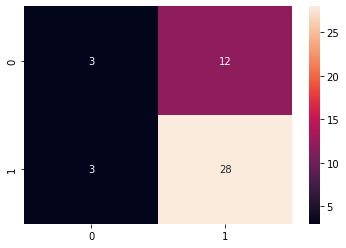

In [20]:
cm_test = confusion_matrix(y_test, pred)
sns.heatmap(cm_test, annot=True, fmt='d')

<AxesSubplot:>

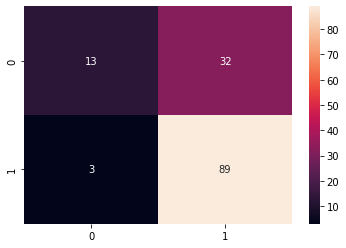

In [21]:
y_pred_train = knn.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm_train, annot=True, fmt='d')